In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import os

In [2]:
#read the dataset
pdata=pd.read_csv('Tweets.csv')

In [3]:
#Calling the dataframe
pdata.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
#checking for missing values
pdata.isnull().sum() * 100 / len(pdata)

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [5]:
pdata.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
pdata.shape

(14640, 15)

In [7]:
#We do the EDA For the project

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

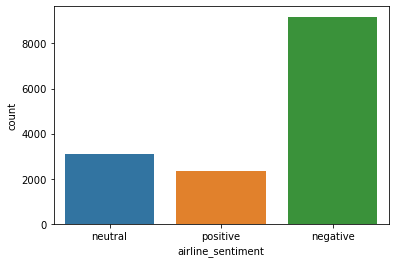

In [8]:
print(pdata['airline_sentiment'].value_counts())
sns.countplot(pdata['airline_sentiment'])

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='count'>

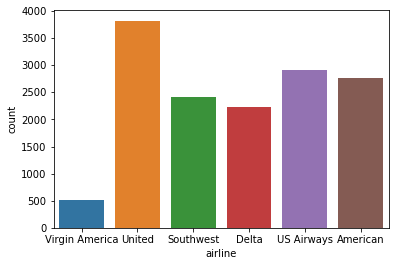

In [9]:
print(pdata.airline.value_counts())
sns.countplot(pdata['airline'])

In [10]:
#Here we drop all the unwanted coloums
#pdata.drop('airline_sentiment_gold',axis = 1,inplace=True)
#pdata.drop('negativereason_gold',axis = 1,inplace=True)
#pdata.drop('tweet_coord',axis = 1,inplace=True)

negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64 US Airways
negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64 United
negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64 American


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64 Southwest
negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64 Delta
negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64 Virgin America


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


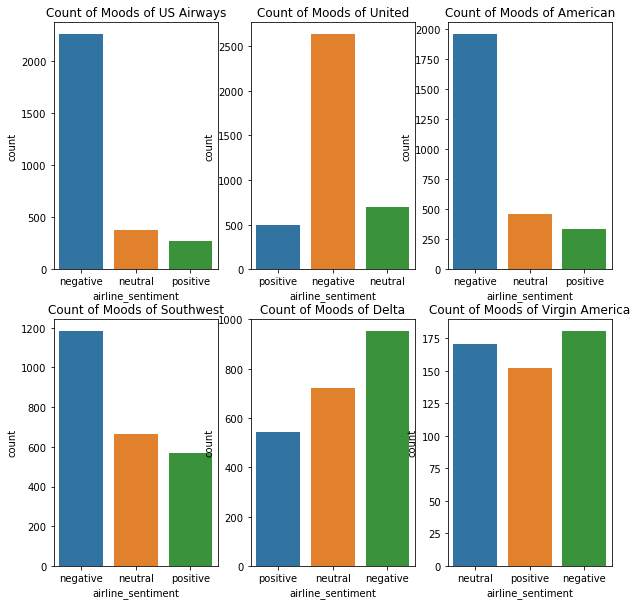

In [11]:
#calculate no of sentiment for each airline 
plt.figure(1,figsize=(10,10))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines:
    indices=airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_value=pdata[pdata['airline']==i]
    print(new_value['airline_sentiment'].value_counts(),i)
    Index = [1,2,3]
    sns.countplot(new_value['airline_sentiment'])
    plt.title('Count of Moods of '+i)

In [12]:
#Clean the text data and then we check most postive and most negative comment on the text data

In [13]:
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#conda install -c conda-forge/label/cf202003 wordcloud

In [15]:
#*Word cloud:-visual representation of the text data 
#They are very popular because they help us easily spot the most frequently occurring words. The more frequent the word is used, 
#the larger and bolder it is displayed. That the help to tackel the main problem *

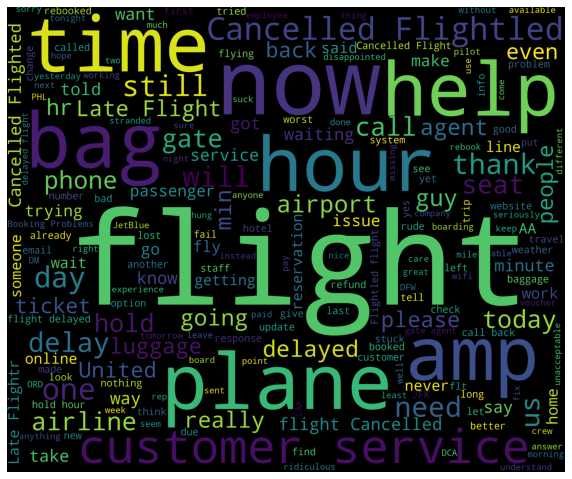

In [16]:
new_data=pdata[pdata['airline_sentiment']=='negative']
words = ' '.join(new_data['text'])
cleaned_word=' '.join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                          and word !='RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

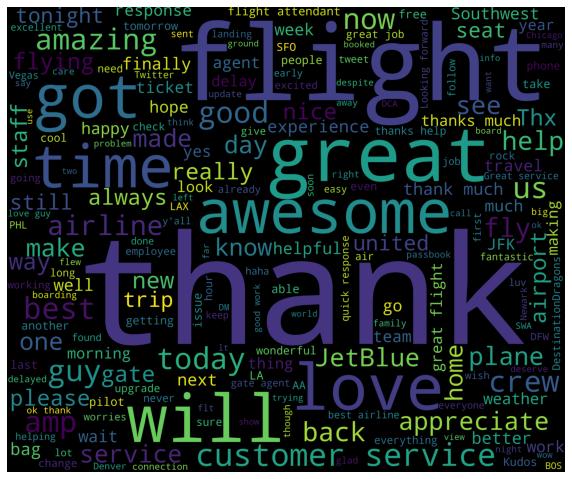

In [17]:
new_data=pdata[pdata['airline_sentiment']=='positive']
words = ' '.join(new_data['text'])
cleaned_word=' '.join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                          and word !='RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

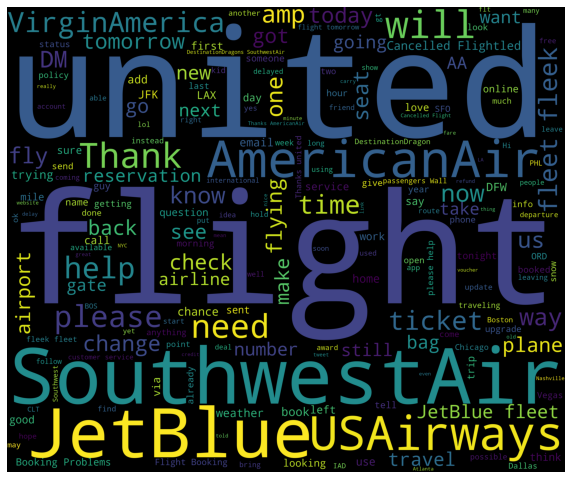

In [18]:
neutral_text=pdata[pdata['airline_sentiment']=='neutral']
words=''.join(neutral_text['text'])
cleaned_word=' '.join([word for word in words.split()
                      if 'http' not in word
                       and not word.startswith('@')
                        and word!='RT'])
wordcloud=WordCloud(stopwords=STOPWORDS,
                    background_color='black',
                      width=3000,
                      height=2500).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


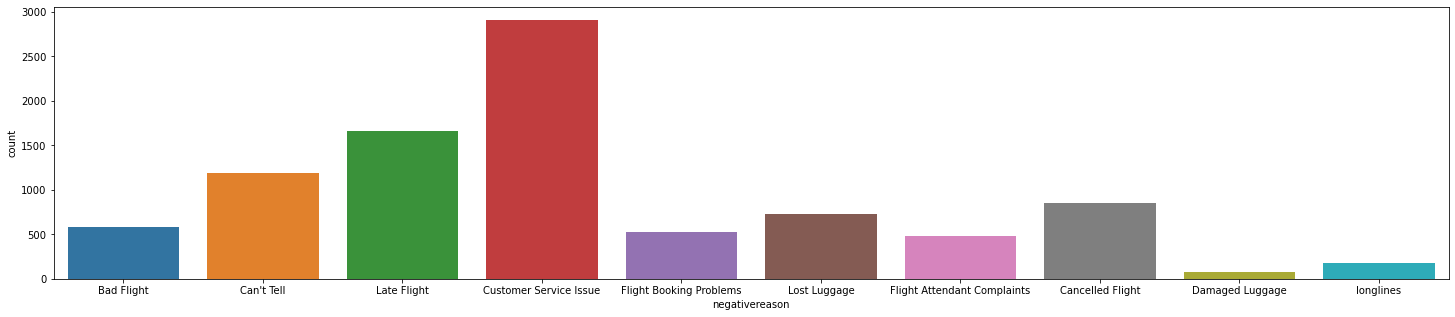

In [19]:
print(pdata.negativereason.value_counts())
plt.figure(figsize=(25,5))
sns.countplot(pdata.negativereason)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

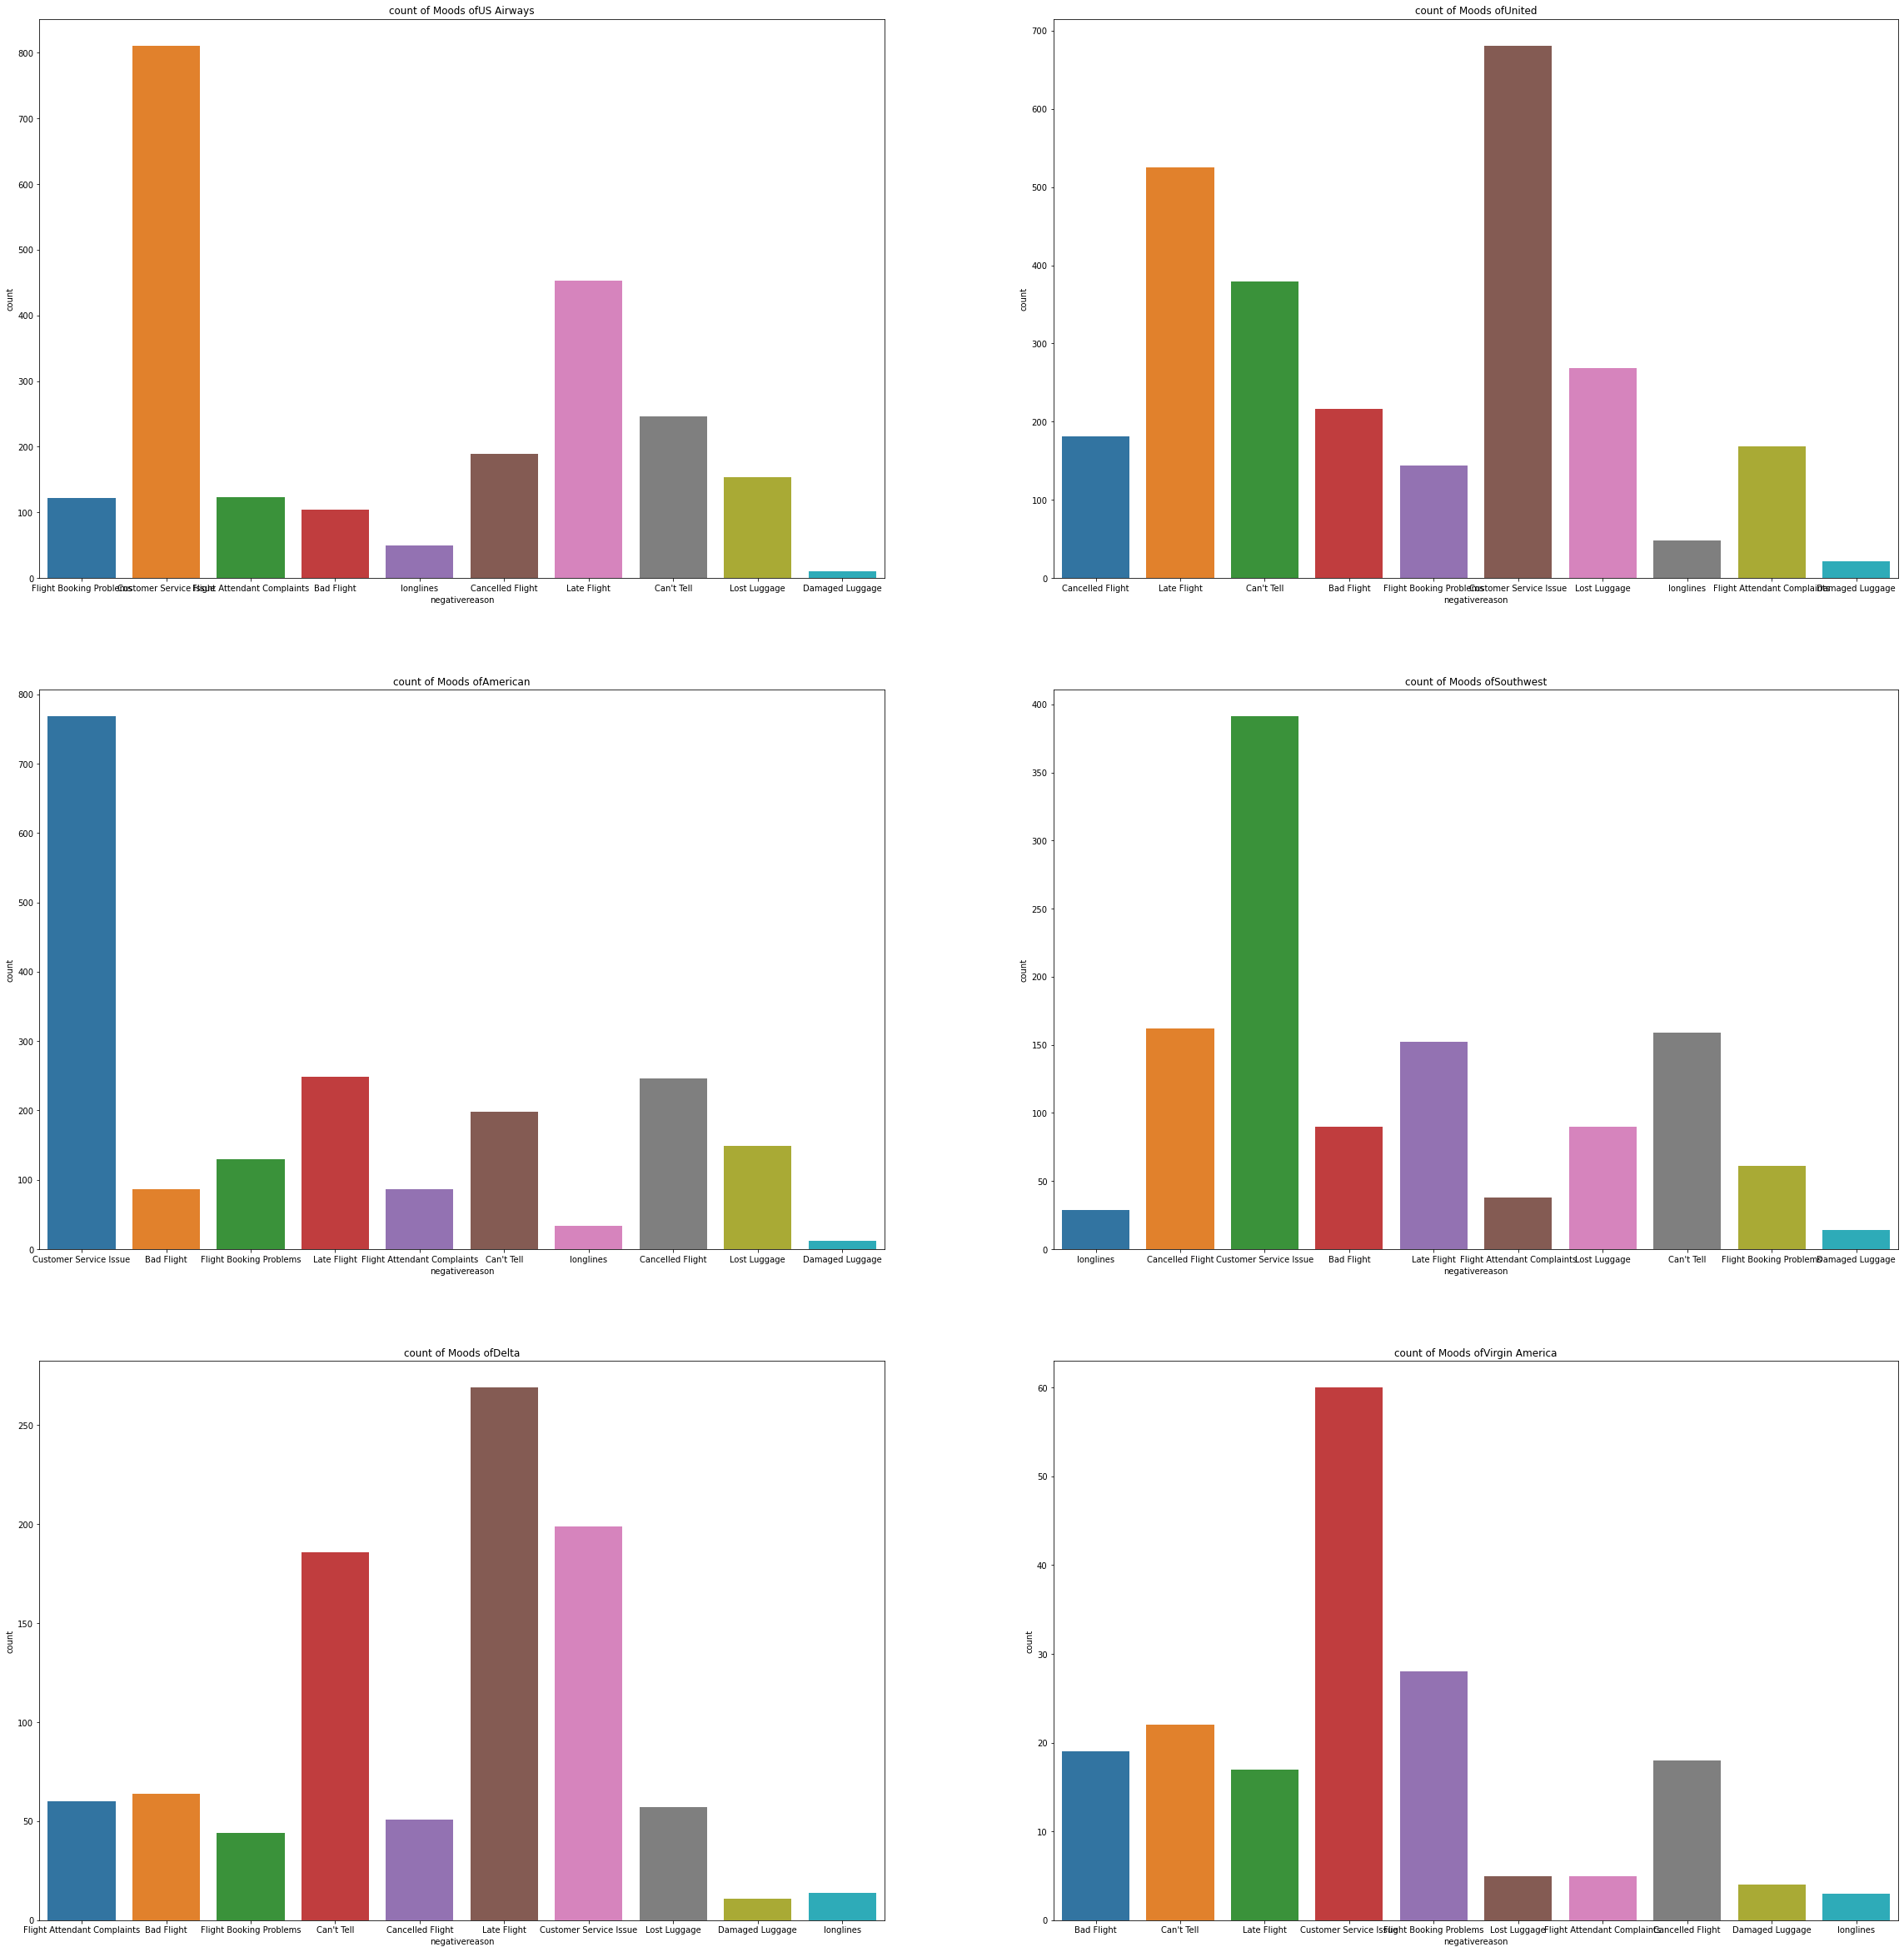

In [20]:
#Neagative reason by airline that the get type of reviews gave by the customer
plt.figure(1,figsize=(40,42))
airline=['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airline:
    indices=airline.index(i)
    plt.subplot(3,2,indices+1)
    new_values=pdata[pdata['airline']==i]
    Index=[1,2,3,4,5,6,7,8,9,10]
    sns.countplot(new_values['negativereason'])
    plt.title('count of Moods of'+i)

In [21]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [22]:
def preprocess(x,stem=False):
    x=re.sub(text_cleaning_re,'  ',str(x).lower()).strip()
    tokens=[]
    for token in x.split('\n'):
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
        return '  '.join(tokens)
pdata.text=pdata.text.apply(lambda x:preprocess(x))

In [23]:
#postive and neutrl sentiment aree coherent with each other thats why we using 
#label encoding technique 1 denote postive and negative sentiment convert to the 0

In [24]:
pdata['sentiment']=pdata['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [25]:
print(pdata.sentiment.value_counts())

0    9178
1    5462
Name: sentiment, dtype: int64


In [26]:
y=pdata.sentiment

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
X= vectorizer.fit_transform(pdata.text)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
pred = model.predict(X_test)

In [33]:
model.score(X_test,y_test)

0.8316256830601093

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1870
           1       0.80      0.71      0.75      1058

    accuracy                           0.83      2928
   macro avg       0.82      0.81      0.81      2928
weighted avg       0.83      0.83      0.83      2928



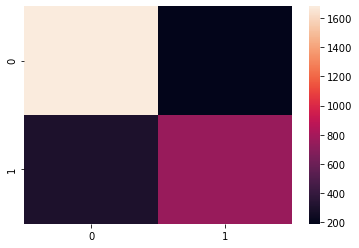

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

In [35]:
#import shap
#explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")
#shap_values = explainer.shap_values(X_test)
#X_test_array = X_test.toarray()

In [36]:
from sklearn.ensemble import RandomForestClassifier
models=RandomForestClassifier()
models.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
score = models.score(X_test, y_test)
score

0.7988387978142076

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1870
           1       0.79      0.60      0.68      1058

    accuracy                           0.80      2928
   macro avg       0.80      0.76      0.77      2928
weighted avg       0.80      0.80      0.79      2928



<AxesSubplot:>

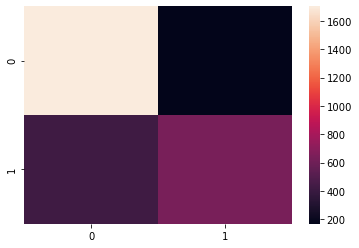

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, models.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, models.predict(X_test)))

In [39]:
from sklearn.svm import SVC
svm=SVC()
svm=SVC(kernel="rbf", C=0.025, probability=True)

In [40]:
svm.fit(X_train,y_train)

SVC(C=0.025, probability=True)

In [41]:
score = svm.score(X_test, y_test)
score

0.6536885245901639

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1870
           1       0.96      0.04      0.08      1058

    accuracy                           0.65      2928
   macro avg       0.80      0.52      0.43      2928
weighted avg       0.76      0.65      0.53      2928



<AxesSubplot:>

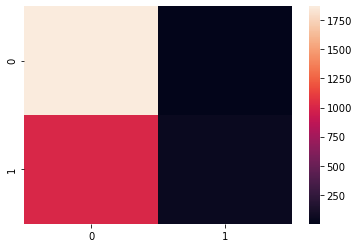

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, svm.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, svm.predict(X_test)))